In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

# Regression Analysis

In [440]:
price = pd.read_csv('./car-price-prediction/CarPrice_Assignment.csv').dropna()
price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [441]:
price = price.select_dtypes(include=['int','float']).drop(columns=['car_ID','symboling'])

In [442]:
df = price[['horsepower','price']]

In [443]:
lr = LinearRegression()

In [444]:
lr.fit(df[['horsepower']],df['price'])

LinearRegression()

In [445]:
lr.coef_

array([163.26306097])

In [446]:
lr.intercept_

-3721.7614943227636

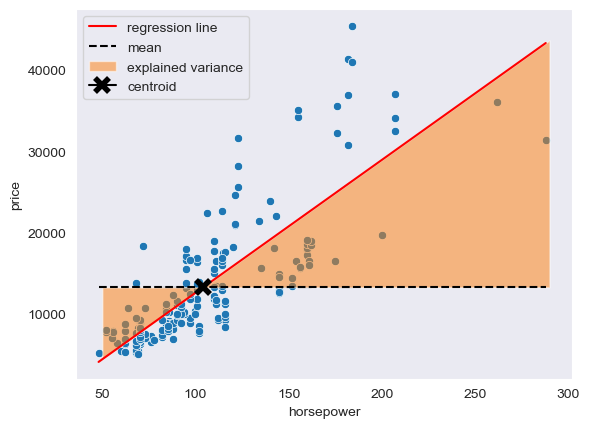

In [447]:
sns.set_style('dark')
sns.scatterplot(data=df,x='horsepower',y='price')
sns.lineplot(x=df.horsepower,y=lr.predict(df[['horsepower']]),color='r',label='regression line')
sns.lineplot(x=df.horsepower,y=df.price.mean(),label='mean',ls='--',color='black')
x = np.linspace(50,290)
y1 = 0*x+df.price.mean()
y2 = lr.coef_[0]*x+lr.intercept_
plt.fill_between(x,y1,y2,alpha=0.5,label='explained variance')
plt.plot(df.horsepower.mean(),df.price.mean(),marker='x',color='black',markersize=10,label='centroid',markeredgewidth=4)
plt.legend()
plt.show()

In [448]:
X = df.iloc[:,0]

In [449]:
y = df.iloc[:,1]

In [450]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [451]:
model.params

const        -3721.761494
horsepower     163.263061
dtype: float64

In [452]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.48e-48
Time:                        10:03:57   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

***
**Horsepower is able to explain 65.3% of the variance in the Price**

F-statistic is very large and p value as <0.01 indicating that we do have a statistically significant<br>
**linear relation** b/w horsepower and price

t-statistic is as large and p value is <0.01 indicating that **population slope** is **significantly different from 0**.<br>
Horsepower is in fact a revelant feature in predicting the price of a car.<br>
We can also notice, the 95% confidence interval **doesn't contain 0.**<br>
We are 95% confident that the **TRUE POPULATION SLOPE** is between 146 and 179

1 unit change in horsepower results in 163.2631 units change in price.

Both the Omnibus and Jaeque-Bera Tests indicate that we have violated the normaily of residuals assumption.

In [453]:
model.cov_params().apply(np.sqrt) # observe the diagonal elements there are the std err of the coefficients

,const,horsepower
const,929.849242,NaN
horsepower,NaN,8.351479


In [479]:
multicollinearity = price[['horsepower','enginesize','citympg','highwaympg','price']]

In [480]:
X = multicollinearity.iloc[:,0:-1]
y = multicollinearity.iloc[:,-1]

In [481]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.params

const        -2978.941453
horsepower      46.566117
enginesize     118.825791
citympg         29.113162
highwaympg    -143.303517
dtype: float64

In [482]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     197.0
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           3.48e-68
Time:                        10:11:58   Log-Likelihood:                -1968.8
No. Observations:                 205   AIC:                             3948.
Df Residuals:                     200   BIC:                             3964.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2978.9415   2798.531     -1.064      0.2

In [483]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = multicollinearity.columns.values[:-1]
vif_values = np.array([variance_inflation_factor(multicollinearity.values[:,:-1],i) for i in range(features.shape[0])])

In [484]:
vif = pd.DataFrame(vif_values,index=features,columns=['vif'])

In [485]:
vif

,vif
horsepower,31.078131
enginesize,32.109944
citympg,358.511745
highwaympg,387.567706


In [486]:
model.cov_params().apply(np.sqrt)

,const,horsepower,enginesize,citympg,highwaympg
const,2798.531185,NaN,NaN,NaN,NaN
horsepower,NaN,14.409012,NaN,35.068092,NaN
enginesize,NaN,NaN,11.111279,NaN,25.456780
citympg,NaN,35.068092,NaN,184.435701,NaN
highwaympg,NaN,NaN,25.456780,NaN,166.096178


<Axes: >

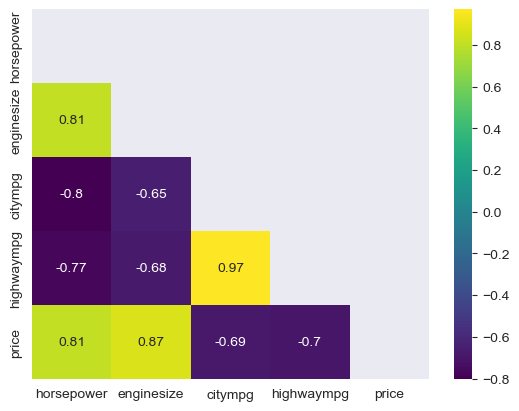

In [487]:
sns.heatmap(multicollinearity.corr(),
            annot=True,cmap='viridis',
            mask=np.triu(np.ones((multicollinearity.shape[1],multicollinearity.shape[1]))))

In [488]:
model.condition_number

1949.341761434672

***
citympg is negatively correlated with the price but the coefficient we obtained for citympg was positive.
